# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS207 Systems Development for Computational Science
## Final Project
## Future Features



**Harvard University**<br/>
**Fall 2019**<br/>
**Instructor**: David Sondak <br/>
**Team #14**: Fantastic Four<br/>
**Students**: Daniel Cox, Anna Davydova, Stephen Moon, Valentina Toll Villagra   <br/>
**Git Repository**:https://github.com/IACS-CS-207-FantasticFour/cs207-FinalProject


<hr style="height:2pt">

*“Nothing takes place in the world whose meaning is not that of some maximum or minimum.”*
― Leonhard Euler

**Future Features**

In the financial markets, large institutions (e.g. banks, asset managers) hold complex portfolios with a variety of financial instruments. While calculating the value of such portfolios can be done fairly easily with simulations and aggregation of market pricing, the sensitivities of these portfolios to changes in price, volatility and interest rates in the market can be a lot more difficult to calculate and come with an accuracy vs. efficiency trade off. 


Given the time and the scope of this project we chose to focus on a subset of the financial instruments and potential end users.  Specifically, we aim to extend our DeltaPi package into a second package HedgeDeltaPi that would be useful to equity options traders as they estimate sensitivities  of their options portfolios and purchase underlying assets (delta-hedge) to minimize their volatility. Accurate and efficient estimate of these sensitivities would allow options traders to buy the right amounts of options to hedge their stock positions from big swings in the asset prices (more on this later).

Here we will focus on vanilla, European, non-dividend paying stock options that can only be exercised on specified date of their expiration as opposed to American options that can be exercised during any time up until the expiration date. 

***What are Financial Options?***

A call option is a right but not an obligation to buy an underlying asset (in our case stock) at a given price (strike price) on a given date (expiration date).  Note from the plot below that the option has no intrinsic value below the strike price of USD100.  However, as the stock reaches that value and climbs higher, the intrinsic value of the option is the difference between USD100 and the current price (in the >100 region). That makes sense because we can buy the stock at a 100 and sell it at a price that is now >100, netting a profit that is now the intrinsic value of the option. When the stock price crosses the strike value like this, the option goes from being out-of-the-money to being in-the-money.

$$\text{Value of European Call Option}$$

![](http://www.quantopia.net/wp-content/uploads/2013/03/EuroCallRates.png)</br>
$$\text{source: www.quantopia.net/wp-content/uploads/2013/03/EuroCallRates.png}$$

The plot above illustrates the value progression of a European call option. Essentially, call value (blue curve) is made up of two components: 1) intrinsic value and 2) time value. The green line is its intrinsic value, that goes from 0 when the option is out of the money to climbing with the stock price once it crosses over the strike value at USD100.  The orange curve is the time value of the option that takes into account how far we are from the expiration date (since we cannot exercise the option until it gets there)  and how close we are to the strike price, the discount rate (risk free rate, usually a 10 year Treasury) and the overall volatility of the share price. Black Scholes equation for pricing options takes all of these variables into account (more on this later).  

A put option is a right but not an obligation to sell an underlying asset (in our case stock) at a given price (strike) on a given date (expiration).  The plot below shows that the put option has no intrinsic value until the stock price drops below the strike. Then the intrinsic value of the option is the profit one would net by buying the stock <100 and selling it at a strike price of USD100. Similarly to the call option, the total value of the put option is a combination of intrinsic value and time value that takes into account how far the stock is from the strike, time to expiration and stock volatility discounted by the risk free rate. 

$$\text{Value of European Put Option}$$

![](http://www.quantopia.net/wp-content/uploads/2013/03/EuroPutRates.png)<br/>
$$\text{source: www.quantopia.net/wp-content/uploads/2013/03/EuroPutRates.png}$$

The classical approach to valuing options is with Black-Scholes Equation that describes the option price overtime as follows:

$$\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^2 S^2\frac{\partial^2 V}{\partial S^2}+r S\frac{\partial V}{\partial S} -r V = 0$$

where $V$ is the value of the option, $t$ is time, $\sigma$ is volatility of the underlying asset, $S$ is the price of the underlying asset and $r$ is the risk free rate (Black and Scholes, 1973).

Further, Black-Sholes-Merton formula for estimating price of the European Call option is as follows:

$$C(S_0,t)=S_0N(d_1)-Ke^{-r(T-t)}N(d_2)$$

and similarly the put option value is as follows:


$$P(S_0,t)=Ke^{-r(T-t)}N(-d_2)-S_tN(-d_1)$$

where $S_0$ is the stock price, $C(S_0,t)$ is a price of the call option and $P(S_0,t)$ is price of a put option as a function of stock price and time, $K$ is the strike prices, $(T-t)$ is time to maturity represented in years and $N(d_1)$ and $N(d_2)$ are  cumulative distribution functions for a standard normal distribution (Merton, 1973).

$$d_1=\frac{ln(\frac{S_t}{K})+(r+\frac{\sigma^2_s}{2})(T-t)}{\sigma_s\sqrt{(T-t)}}$$

$$d_2=\frac{ln(\frac{S_t}{K})+(r-\frac{\sigma^2_s}{2})(T-t)}{\sigma_s\sqrt{(T-t)}}=d_1-\sigma_s\sqrt{(T-t)}$$

$$N(d_1)=\int_{-\infty} ^{d_1}f(u)du=\int_{-\infty}^{d_1}\frac{1}{\sqrt{2\pi}}e^{\frac{-u^2}{2}}du$$

$$\dot{N}(d_1)=\frac{\partial N(d_1)}{\partial d_1}=\frac{1}{\sqrt{2\pi}}e^{-\frac{d_1^2}{2}}$$

We can solve for both put and call deltas and obtain a closed form solution in the form. 

$$\Delta_{call}=\frac{\partial C_t}{\partial S_t}=N(d_1)+S_t\frac{\partial N(d_1)}{\partial S_t}-Ke^{-r(T-t)}\frac{\partial N(d_2)}{\partial S_t}= \dot{N}(d_1)$$

$$\Delta_{put}=\frac{\partial P_t}{\partial S_t}=Ke^{-r(T-t)}\frac{\partial N(-d_2)}{\partial S_t}-N(-d_1)-S_t\frac {\partial N(-d_1)}{\partial S_t}=\dot{N}(d_1)-1$$

Note, that delta is positive for call options and negative for put options, which makes sense.  As the price of the stock goes up so does the value of call option (i.e. right to buy at potentially lower price).  As the price of the stock goes up, the value of the put option goes down (i.e. right to sell at potentially lower price is not valuable). The plot below illustrates this by plotting call/put deltas vs. the 'moneyness' of the option (OTM=Out of the Money, ATM = At the Money and ITM = In the Money)

![](https://www.optiontradingtips.com/images/delta-vs-moneyness.png)<br/>
$$\text{source: https://www.optiontradingtips.com/images/delta-vs-moneyness.png}$$

We can also obtain closed form solution for first order partial derivative w.r.t. volatility - Vega (note its the same for both put and call options):

$$v=\frac{\partial{C_t}}{\partial\sigma}=\frac{\partial{P_t}}{\partial\sigma}=S_t\sqrt{T-t} N(d_1)$$

However, it is important to keep in mind that the $\sigma$ (volatility) of the option is not static overtime (i.e. the volatility surface is not flat).  Thus, rather then focusing on simple delta above, our package will take this into account and calculate minimum variance delta that minimizes volatility of a delta neutral portfolio (i.e. more accurate than static delta).  For local volatility models, for options that are closer to being in the money, several papers ( Derman et al (1995), and Coleman et al (2001)) have shown that:

$$\Delta_{MV}=\Delta_{BS}+v_{BS}\frac{\partial{\sigma_{imp}}}{\partial{K}}$$

where $\Delta_{BS}$ $v_{BS}$ are Black Scholes delta and vega respectively, and $\sigma_{imp}$ is the value of implied volatility.  To estimation equations of implied volatility have proven to be most accurate (Isengildina-Massa, et. al 2007).  We will consider them in this package. 

1) Implied volatility equation proposed by Bharadia et al. (1996):

$$\sigma_{imp}\approx\sqrt{\frac{2\pi}{(T-t)}}\frac{C-(S-K)/2}{S-(S-K)/2}$$

2) Implied volatility equation  from Corrado et. al., (1996):

$$\sigma_{imp}\approx\sqrt{\frac{2\pi}{(T-t)}} \frac{1}{S+K}(C-\frac{S-K}{2}+\sqrt{(C-\frac{S-K}{2})^2-\frac{(S-K)^2}{\pi}})$$

DeltaHedgePi will leverage DeltaPi package to calculate the first derivative of $\sigma_{imp}$ and will calculate $\Delta_{BS}$ and $v_{BS}$ using market data inputed by the traders and checking it against the currently available live market data. The package will output the following:<br/>
1) Three delta values: <br/>
&nbsp;&nbsp;    a. classic Black Scholes <br/>
&nbsp;&nbsp;    b.  Black Scholes + Bharadia et al. <br/>
&nbsp;&nbsp;    c.  Black Scholes + Corrado et al.<br/>
2) Depending on the trader's position and type of option, the package will output what action the trader needs to take in order to delta hedge their position. <br/> 
3) Two visualization for volatility surfaces for the non static approaches.<br/>
&nbsp;&nbsp; a.  Black Scholes + Bharadia et al. <br/>
&nbsp;&nbsp; b.  Black Scholes + Corrado et al.<br/>

The goal of this package is to provide the traders with a more accurate delta estimations for near the money options and make the process of delta hedging easier. 

***What is Delta Hedging?***

In the simple case of vanilla, non dividend paying, European call/put options above, delta hedging refers to buying or selling specific amounts of underlying stock to neutralize the impact of the stock price moves on the options portfolio.  Let us consider the following example:

Consider the following example. Let's supposed we have a stock XYZ that currently has a price of USD100 and the bank sold call options (a while ago before the stock price run up) for 1000 shares with strike USD10.  Thus, the buyer of our option has the right but not obligation to buy 1000 shares of XYZ at just USD10 on expiration date (right now the option is deep in the money). If the delta of this call option is 0.5, this means that for every USD1 increase in stock price, the value of the call option goes up USD0.50 (to the holder).  To execute a delta hedge, the bank should buy 1000*.5=500 shares of XYZ. Now if the stock price goes down by USD1, the bank will lose USD500 on the stock position but will gain 0.5x1000=USD500 on its short call option position. Thus, the impact is neutral.  

Keep in mind that delta is not static as the slope of option price vs. stock price is usually non linear. This is why accurate and frequent estimates of delta are so important (Lee, 2008).

In summary, HedgeDeltaPi will apply automatic differentiation from DeltaPi to compute deltas using 3 approaches described above: 1) Pure Black Scholes, 2) Black Scholes + Implied Vol Simple, 3) Black Scholes + Implied Vol More Complex. The package will then produce a buy/sell recommendation and the quantity of shares in the underlying assets required to successfully delta hedge the traders' position.  The package will also produce a volatility surface visualizations using the latter 2 approaches (classic Black Scholes volatility surface is flat). 

**Note:** The package is pulling live options data from yahoo finance to confirm current market value of call and put options respectively and realistic expiration dates and strike values. Thus, **the package assumes that the traders are analyzing real options that would practically trade in the market** (i.e. not wildly mis-priced/unrealistically structured options that wouldn't occur in real life). If the user would like to run the package on real options for practice here are some of the valid options to try: 

In [60]:
#Possible Imputs for Practice:
#Run during market Open (weekdays 9:30-4)
#if running after market close use option price of $20 as default input when prompted
#inputs:
#ticker='nflx'
#exp_year=2021
#exp_month=1
#exp_day=15
#op_type='calls'
#strike=325

#ticker='nflx'
#exp_year=2021
#exp_month=1
#exp_day=15
#op_type='puts'
#strike=290

#ticker='appl'
#exp_year=2021
#exp_month=1
#exp_day=15
#op_type='calls'
#strike=290

#ticker='appl'
#exp_year=2021
#exp_month=1
#exp_day=15
#op_type='puts'
#strike=260


### Implementing DeltaHedgePi

In [37]:
#installing important packages for data retrieval
#import sys
#!{sys.executable} -m pip install yahoo_fin
#!{sys.executable} -m pip install requests_html

Please Select Type of Option to Evaluate
1) Exit
2) Puts
3) Calls
3
Please Enter Ticker
aapl
Please Enter Strike
300
Please Enter Expiration Year
2020
Please Enter Expiration Month
1
Please Enter Expiration Day
17
Black Scholes Delta:  0.21808238022023385
Bharadia delta:  0.2202803979692768
Corrado delta:  0.21918138909475532
Would You Like to Delta Hedge Your Position: y/n?
y
How many units? Enter + values for long and - values for short
100
According to Black Scholes you need to  sell short  21  shares of  aapl
According to Bharadia apporach you need to  sell short  22  shares of  aapl
Accoding to Corrado approach you need to  sell short  21  shares of  aapl


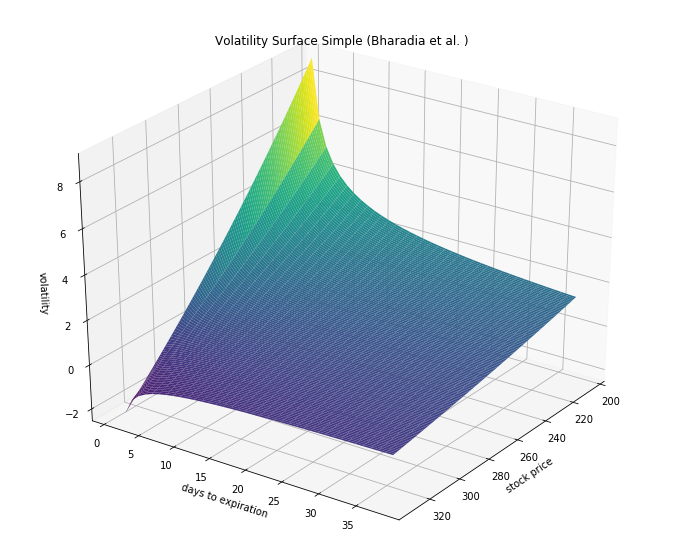

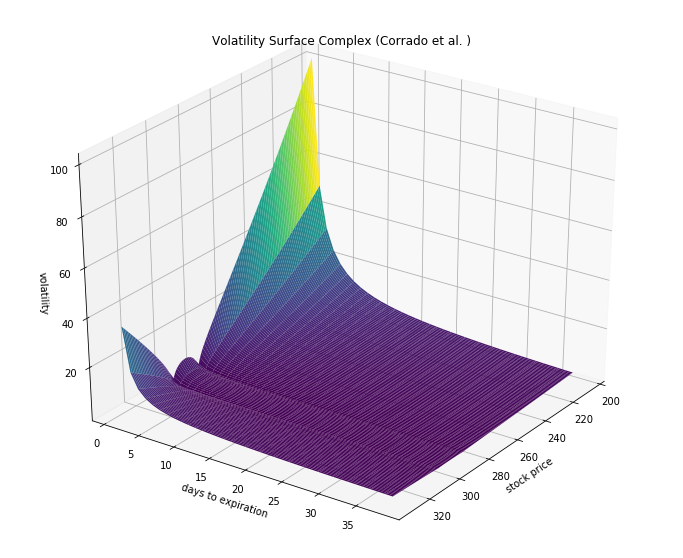

In [83]:
#necessary imports
import pandas_datareader as pdr
from pandas_datareader.data import DataReader as dr
import datetime as dt
from datetime import date
from yahoo_fin import stock_info as si
from yahoo_fin import options
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  
from AutoDiff import AutoDiff  #importing DeltaPi package!


#first we define Black Scholes function to calculate delta and vega pull uptodate financial data

def BS_Delta(ticker, exp_year, exp_month, exp_day, op_type, strike):
    """ Obtain upto date financial data for stock price, option price, volatility, risk free rate
    and calculates delta and vega from Black Scholes equation. Returns delta, vega, time to expiration,
    most uptodate share price and corresponding option price.
    
    INPUTS:
    ======
    ticker:     accepts both upper and lower case (string)
    exp_year:   year of expiration (int)
    exp_month:  month of expiration (int)
    exp_day:    day of expiration (int)
    opt_type:   'puts' for put and 'calls' for call(string)
    strike:     price at which the opion can be excercised (int)
    
    OUTPUT:
    ======
    delta_bs:   delta calculated using Black Scholes equation (partial derivative w.r.t. share price)
    vega:       vega calculated using Black Scholes euqation (partial derivative w.r.t. share price vol)       
    T_t:        time to option expiration as fraction of the year
    S:          share price
    C:          option price  
    
    NOTES:
    ====== 
    This fuction pulls most upto date financial data form yahoo finance. The option values are pulled 
    pulled during the market hours (9:30am-4pm, mon-fri).  When the market is closed, the function
    will ask the user to input the option price. Also, just like Black Sholes equation, this function
    relies on static volatlity measured as historical s.d. of the share price over the past year (i.e. we
    pull in a year share prices and calculate standard deviation of that for sigma).
    This function also requires the following pacakges for data retrieval in addition to pandas, numpy amd
    datetime:
    import sys
    !{sys.executable} -m pip install yahoo_fin
    !{sys.executable} -m pip install requests_html
    
    EXAMPLE:
    =======
    Let's suppose you wanted to run a GE call expriing on Jan 17, 2020, with  strike 10.
    ticker='GE'
    exp_year=2020
    exp_month=1
    exp_day=17
    exp_date=str(str(exp_month)+'/'+str(exp_day)+'/'+str(exp_year))
    op_type='calls'
    strike=10
   
    >>> delta_bs, vega, T_t, S, C = BS_Delta(ticker, exp_year, exp_month, exp_day, op_type, strike) 
    0.2803917681986156 0.009142607098052206 0.10684931506849316 11.100000381469727 0.0
    since the function is pulling live data for this doctest the output will keep changing
    
    
    
    
    """
    
    
    #convert to exp_date formate
    exp_date=str(str(exp_month)+'/'+str(exp_day)+'/'+str(exp_year))
    #get current risk free rate
    #we are using 10tyear treasury which is industry standard
    tbills = ['DGS10']
    yc = dr(tbills, 'fred') 
    risk_free=np.array(yc)[-1][0]/100
    #get current date
    today=date.today()
    #get stock price
    S=si.get_live_price(ticker)
    #get price of option closest to the same date/strike as our option
    try:
        table=options.get_options_chain(ticker,exp_date )
        strikes=table[op_type]['Strike']
        closest_strike=min(strikes, key=lambda x: abs(x-strike))
        index=table[op_type][table[op_type]['Strike'].isin([closest_strike])==True].index[0]
        C=np.mean(table[op_type][['Bid','Ask']].iloc[index])
    except:
        print('Could not find live option price, will calculate implied price instead')
        C=0 #place holder value, we will calculate black scholes implied value below
        
        #print('could not find live price for this option type. please enter best available estimate:')
        #C=float(input(""))
    def vol_est(today, ticker):
    #get volatility of underlying assets
        end = today
        start=dt.datetime.now() - dt.timedelta(days=365)
        prices=list(pdr.get_data_yahoo(ticker, start, end)['Adj Close'])
        returns=[]
        i=0
        while i < (len(prices)-1):
            r=np.log(prices[i+1]/prices[i])
            returns.append(r)
            i=i+1
        vol=np.std(returns)*(250**(1/2))
        return vol
    #setting up all the inputs for the Black Scholes formula
    vol=vol_est(today, ticker)
    T=dt.date(exp_year, exp_month, exp_day,)
    t=today
    r=risk_free
    T_t=(T-t).days/365
    #first we will calculate d1 and d2
    d1=(np.log(S/strike)+(r+vol**2/2)*(T_t))/(vol*((T_t)**(1/2)))
    d2=d1-vol*(T_t)**(1/2)
    if C==0:
        if op_type == 'calls':
            C=S*(1/(2*np.pi)**(1/2))*np.e**(-d1)*d1 - strike*np.e**(-r*(T_t))*(1/(2*np.pi)**(1/2))*np.e**(-d1)*d1
        else:
            if op_type =='puts':
                C=strike*np.e**(-r*T_t)*(1/(2*np.pi)**(1/2))*np.e**(d2)*(-d2)-S*(1/(2*np.pi)**(1/2))*np.e**(d1)*(-d1)
    #now we will calculate delta depending on option type
    if op_type=='calls':
        delta_bs=1/((2*np.pi)**(1/2))*np.e**(-d1**2/2)
    else:
        delta_bs=1/((2*np.pi)**(1/2))*np.e**(-d1**2/2)-1
    #calculate vega (same formula for puts and calls)
    vega=S/100*np.e**(-T_t)*(T_t**(1/2))*delta_bs
                                                          
    return delta_bs, vega, T_t, S, C  

#now we build a volatility surface plot function

def Volatility_Surface(ticker, exp_year, exp_month, exp_day, op_type, strike, price):
    """ This function calculates and plots 2 volatility 3D surface plots of stock volatlity as calculated 
    by Bharadia and Corrado approximations vs. time and share price of the underlying asset. 
    
    INPUTS:
    ======
    ticker:     accepts both upper and lower case (string)
    exp_year:   year of expiration (int)
    exp_month:  month of expiration (int)
    exp_day:    day of expiration (int)
    opt_type:   'puts' for put and 'calls' for call(string)
    strike:     price at which the opion can be excercised (int)
    price:      option price (float)
    
    OUTPUT:
    ======
    3Dplot Bharadia:  surface plot for estimated stock price volatilty over time and share price space
    3Dplot Corrado:   surface plot for estimate of stock volatility over time and share price space.
    
    NOTES:
    ====== 
    This function pulls live stock price data and requires the following pacakges to run properly:
    pandas
    numpy
    mpl_toolkits
    matplotlib.pyplot 
    datetime
    yahoo_fin 
    requests_html 

    """
    
    
    #current data
    today=date.today()
    T=dt.date(exp_year, exp_month, exp_day,)
    #cacl time to expiration
    t=today
    T_t=(T-t).days/365
    #calculate volatility
    def vol_est(today, ticker):
            #get volatility of underlying assets
                end = today
                start=dt.datetime.now() - dt.timedelta(days=365)
                prices=list(pdr.get_data_yahoo(ticker, start, end)['Adj Close'])
                sd=np.std(prices)
                return sd
    vol=vol_est(today, ticker)
    S=si.get_live_price(ticker)
    S_low=int(S-2*vol)
    S_high=int(S+2*vol)
    S_range=list(range(S_low, S_high))
    days_range=list(range(1,int((T-t).days)))
    C=price
    vol_s=[]
    vol_c=[]
    #get range of volatlities for both methods
    for i, t in enumerate(days_range):
            vol_t=[]
            vol_tc=[]
            for i, s in enumerate(S_range):
                    vol_simple=(2*np.pi/(t/365))**(1/2)*((C-(s-strike))/2)/(s-(s-strike)/2)
                    vol_t.append(vol_simple)
                    vol_complex=((2*np.pi/(t/365))**2)**(1/2)*1/(s+strike)*(((C-(s-strike)/2+((C-(s-strike)/2))**2-(s-strike)**2/np.pi)**2)**(1/2))**(1/2)
                    vol_tc.append(vol_complex)
            vol_s.append(vol_t)
            vol_c.append(vol_tc)
        
    data = np.array(vol_s)
            
            #prepare the data for plotting
            
            #plot Bharadia approximation
    x, y = np.meshgrid(S_range,days_range)
    fig = plt.figure(figsize=(12,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, data, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
    ax.set_title('Volatility Surface Simple (Bharadia et al. )')
    ax.set_xlabel('stock price')
    ax.set_ylabel('days to expiration')
    ax.set_zlabel('volatility')
    ax.view_init(30, 35)
    fig
            
            
    data = np.array(vol_c)
            
            #plot Corrado approximation
    x, y = np.meshgrid(S_range,days_range)
    fig = plt.figure(figsize=(12,10))
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, data, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
    ax.set_title('Volatility Surface Complex (Corrado et al. )')
    ax.set_xlabel('stock price')
    ax.set_ylabel('days to expiration')
    ax.set_zlabel('volatility')
    ax.view_init(30, 35)
    fig
            
def OptionsRun():
    
    def ObtainInputs():
            print("Please Select Type of Option to Evaluate")
            print("1) Exit")
            print("2) Puts")
            print("3) Calls")
            try:
                option=int(input(""))
            except: 
                print("Please enter number from the options above: ")
                option=int(input(""))
         
            while option not in [1,2,3]:
                    option=int(input("Please enter number from the options above: "))
            if option==3:
                    op_type='calls'
            else:
                    if option==2:
                        op_type='puts'
                    else:
                        print('Thank you. Goodbye!')
                        return
 
            
        
            print("Please Enter Ticker")
            try:
                value = str(input(''))
                si.get_live_price(value)
                
            except ValueError:
                print ("Sorry, {} is not a valid ticker, try again".format(value))
                ObtainInputs()
        
        
            ticker=value
            
            print("Please Enter Strike")
            try:
                option=int(input(""))
            except: ValueError ("Please enter integer value ")
            strike=option
            
            def Date():
                today=date.today()
                print("Please Enter Expiration Year")
                try:
                    option=int(input(""))
                    if option<today.year or option > (today.year+2):
                        print("Please enter a valid listed year")
                        option=int(input(""))
                except: ValueError ("Please enter an integer value ")
                exp_year=option
            
                print("Please Enter Expiration Month")
                try:
                    value=int(input(""))
                except: ValueError ("Please enter valid date ")
                if value>12 or value<1:
                    print("Invalid input for Month. Please try again")
                    value=int(input(""))
                if exp_year==today.year and value<today.month:
                    print("Invalid input for Month. Please try again")
                    value=int(input(""))
                
                exp_month=value
            
                print("Please Enter Expiration Day")
                try:
                    option=int(input(""))
                    exp_day=option
                except: ValueError ("Please enter valid date ")
                if exp_month in [1,3,5,7,8,10,12]:
                    if option>31 or option <1:
                        print("Invalid input for day.  Please try again")
                        option=int(input(""))
                        
                else:
                    if exp_month==2 and exp_year==2020:
                        if option>29 or option <1:
                            print("Invalid input for day.  Please try again")
                            option=int(input(""))
                    else:
                        if exp_month in [4,6,9,11]:
                            if option>30 or option<1:
                                print("Invalid input for day.  Please try again")
                                option=int(input(""))  
               
               
                exp_dat=option
            
                exp_date=str(str(exp_month)+'/'+str(exp_day)+'/'+str(exp_year))
            
                return exp_year, exp_month, exp_day, exp_date
                
            exp_year, exp_month, exp_day, exp_date = Date()
            
            delta_bs, vega, T_t, S, C = BS_Delta(ticker, exp_year, exp_month, exp_day, op_type, strike) 
            
            #print output
            print("Black Scholes Delta: ", delta_bs)
            
            K = AutoDiff(strike, 1)  #####################--AUTODIFF USED HERE                         
            
            simple_implied = np.sqrt(2*np.pi/T_t) * ( ( C -(S - K)/2 ) / ( S - (S - K)/2 ) ) 
            deltaPi_simple_implied= simple_implied.derv
            complex_implied = np.sqrt(2*np.pi/T_t) * (1/(S + K)) *  ( C - ((S - K)/2)) 
                                                                    
            #\+ ((C -(S-K)/2)**2 - ((S-K)**2/np.pi)) )/10000                   
            
            deltaPi_complex_implied = complex_implied.derv                                            
            delta_simple=delta_bs+vega*deltaPi_simple_implied
            delta_complex=delta_bs+vega*deltaPi_complex_implied
            if delta_complex is None:
                delta_complex=delta_simple
                print('Could not approximate Corrado due to ')
            print("Bharadia delta: ", delta_simple)
            print("Corrado delta: ", delta_complex)
            
            print("Would You Like to Delta Hedge Your Position: y/n?")
            try:
                option=str(input(""))
            except: raise ValueError("please entery 'y' or 'n'")
            if option=='y':
                print("How many units? Enter + values for long and - values for short")
                try:
                    option=int(input(""))
                except: raise ValueError('please enter an integer value')
                units=option
                if option >0 and op_type=='puts':
                        action = 'buy'
                elif option>0 and op_type=='calls':
                        action = 'sell short'
                elif option <0 and op_type=='calls':
                        action ='buy'
                elif option <0 and op_type=='puts':
                        action = 'sell short'
                recomend=abs(int(units*delta_bs))
                recomend1=abs(int(units*delta_simple))
                recomend2=abs(int(units*delta_complex))
                print("According to Black Scholes you need to ", action, "",abs(int(recomend)), " shares of ",ticker )
                print("According to Bharadia apporach you need to ", action, "",abs(int(recomend1)), " shares of ", ticker)
                print("Accoding to Corrado approach you need to ", action, "", abs(int(recomend2)), " shares of ", ticker)
                Volatility_Surface(ticker, exp_year, exp_month, exp_day, op_type, strike,C)    
                return
            else:
                Volatility_Surface(ticker, exp_year, exp_month, exp_day, op_type, strike)
                return
            
            return   
            
        
    ObtainInputs()
    
    
        
    
OptionsRun()

In [ ]:
#BS_Delta demo
#inputs:
ticker='GE'
exp_year=2020
exp_month=1
exp_day=17
#exp_date=str(str(exp_month)+'/'+str(exp_day)+'/'+str(exp_year))
op_type='calls'
strike=10
#running the function
delta_bs, vega, T_t, S, C = BS_Delta(ticker, exp_year, exp_month, exp_day, op_type, strike)  #DAN CHANGED HERE 
#print output
print("Black Scholes Delta: ", delta_bs)
print("Black Scholes Vega: ", vega)

In [63]:
def OptionsRun():
    
    def ObtainInputs():
            print("Please Select Type of Option to Evaluate")
            print("1) Exit")
            print("2) Puts")
            print("3) Calls")
            try:
                option=int(input(""))
            except: 
                print("Please enter number from the options above: ")
                option=int(input(""))
         
            while option not in [1,2,3]:
                    option=int(input("Please enter number from the options above: "))
            if option==3:
                    op_type='calls'
            else:
                    if option==2:
                        op_type='puts'
                    else:
                        print('Thank you. Goodbye!')
                        return
 
            
        
            print("Please Enter Ticker")
            try:
                value = str(input(''))
                si.get_live_price(value)
                
            except ValueError:
                print ("Sorry, {} is not a valid ticker, try again".format(value))
                ObtainInputs()
        
        
            ticker=value
            
            print("Please Enter Strike")
            try:
                option=int(input(""))
            except: ValueError ("Please enter integer value ")
            strike=option
            
            def Date():
                today=date.today()
                print("Please Enter Expiration Year")
                try:
                    option=int(input(""))
                    if option<today.year or option > (today.year+2):
                        print("Please enter a valid listed year")
                        option=int(input(""))
                except: ValueError ("Please enter an integer value ")
                exp_year=option
            
                print("Please Enter Expiration Month")
                try:
                    value=int(input(""))
                except: ValueError ("Please enter valid date ")
                if value>12 or value<1:
                    print("Invalid input for Month. Please try again")
                    value=int(input(""))
                if exp_year==today.year and value<today.month:
                    print("Invalid input for Month. Please try again")
                    value=int(input(""))
                
                exp_month=value
            
                print("Please Enter Expiration Day")
                try:
                    option=int(input(""))
                except: ValueError ("Please enter valid date ")
                if exp_month in [1,3,5,7,8,10,12]:
                    if option>31 or option <1:
                        print("Invalid input for day.  Please try again")
                        option=int(input(""))
                else:
                    if exp_month==2 and exp_year==2020:
                        if option>29 or option <1:
                            print("Invalid input for day.  Please try again")
                            option=int(input(""))
                    else:
                        if exp_month in [4,6,9,11]:
                            if option>30 or option<1:
                                print("Invalid input for day.  Please try again")
                                option=int(input(""))  
               
                exp_dat=option
            
                exp_date=str(str(exp_month)+'/'+str(exp_day)+'/'+str(exp_year))
            
                return exp_year, exp_month, exp_date
                
            exp_year, exp_month, exp_date = Date()
            
            delta_bs, vega, T_t, S, C = BS_Delta(ticker, exp_year, exp_month, exp_day, op_type, strike) 
            
            #print output
            print("Black Scholes Delta: ", delta_bs)
            
            K = AutoDiff(strike, 1)  #####################--AUTODIFF USED HERE                         
            
            simple_implied = np.sqrt(2*np.pi/T_t) * ( ( C -(S - K)/2 ) / ( S - (S - K)/2 ) )           
            deltaPi_simple_implied= simple_implied.derv                                                
            
            complex_implied = np.sqrt(2*np.pi/T_t) * (1/(S + K)) *  ( C - ((S - K)/2)\
                                                                     + np.sqrt( (C - (S-K)/2)**2 - (S -K)**2/np.pi ))                   #DAN CHANGED
            deltaPi_complex_implied = complex_implied.derv                                            
            
            delta_simple=delta_bs+vega*deltaPi_simple_implied
            delta_complex=delta_bs+vega*deltaPi_complex_implied
            if delta_complex is None:
                delta_complex=delta_simple
                print('Could not approximate Corrado due to ')
            print("Bharadia delta: ", delta_simple)
            print("Corrado delta: ", delta_complex)
            
            print("Would You Like to Delta Hedge Your Position: y/n?")
            try:
                option=str(input(""))
            except: raise ValueError("please entery 'y' or 'n'")
            if option=='y':
                print("How many units? Enter + values for long and - values for short")
                try:
                    option=int(input(""))
                except: raise ValueError('please enter an integer value')
                units=option
                if option >0 and op_type=='puts':
                        action = 'buy'
                elif option>0 and op_type=='calls':
                        action = 'sell short'
                elif option <0 and op_type=='calls':
                        action ='buy'
                elif option <0 and op_type=='puts':
                        action = 'sell short'
                recomend=abs(int(units*delta_bs))
                recomend1=abs(int(units*delta_simple))
                recomend2=abs(int(units*delta_complex))
                print("According to Black Scholes you need to ", action, "",abs(int(recomend)), " shares of ",ticker )
                print("According to Bharadia apporach you need to ", action, "",abs(int(recomend1)), " shares of ", ticker)
                print("Accoding to Corrado approach you need to ", action, "", abs(int(recomend2)), " shares of ", ticker)
                Volatility_Surface(ticker, exp_year, exp_month, exp_day, op_type, strike,C)    
                return
            else:
                Volatility_Surface(ticker, exp_year, exp_month, exp_day, op_type, strike)
                return
            
            return   
            
        
    ObtainInputs()
    
        
OptionsRun()   


Please Select Type of Option to Evaluate
1) Exit
2) Puts
3) Calls
Please enter number from the options above: 


KeyboardInterrupt: 

Please Select Type of Option to Evaluate
1) Exit
2) Puts
3) Calls
3
Please Enter Ticker
aapl
Please Enter Strike
300
Please Enter Expiration Year
2020
Please Enter Expiration Month
1
Please Enter Expiration Day
17
Black Scholes Delta:  0.21757413492504515
Bharadia delta:  0.21945066932975094
Corrado delta:  0.21909065136430278
Would You Like to Delta Hedge Your Position: y/n?
y
How many units? Enter + values for long and - values for short
-1000
According to Black Scholes you need to  buy  217  shares of  aapl
According to Bharadia apporach you need to  buy  219  shares of  aapl
Accoding to Corrado approach you need to  buy  219  shares of  aapl


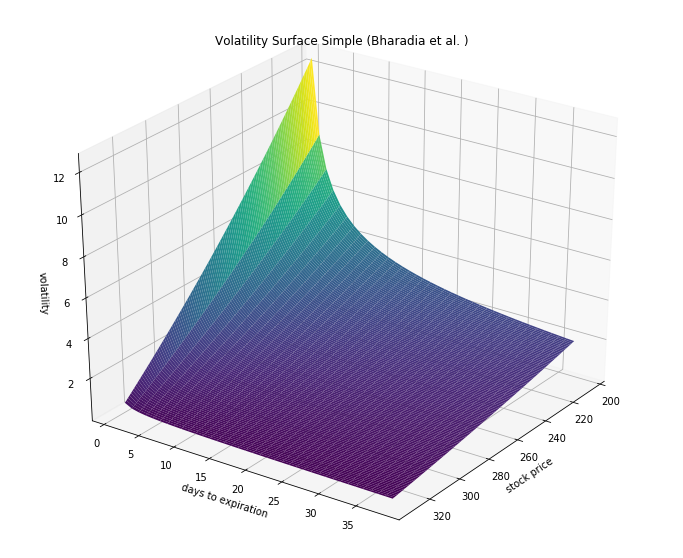

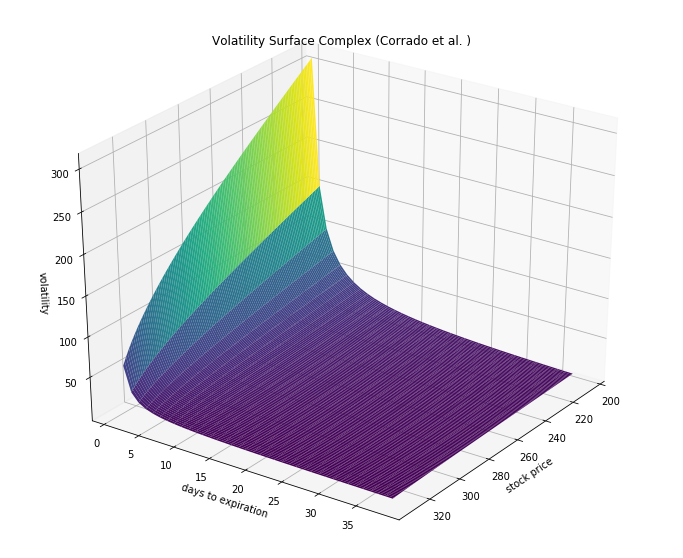

In [62]:
OptionsRun()

# **REFERENCES:**<br/>
Atilim Baydin. Automatic Differentiation in Machine Learning: a Survey. Journal of Machine Learning Research, 2018. <br/> 
Fischer Black, & Myron Scholes, M. The Pricing of Options and Corporate Liabilities. Retrieved November 1, 2019, from http://www.jstor.org/stable/1831029<br/>
George F. Corliss. Application of differentiation arithmetic, volume 19 of Perspectives in Computing, pages 127–48. Academic Press, Boston, 1988.<br/>
Andreas Griewank and Andrea Walther. Evaluating Derivatives: Principles and Techniques of Algorithmic Differentiation. Humboldt-Universität zu Berlin, Berlin, Germany. Second Edition, 2008.<br/>
Michael Heath. Scientific Computing: An Introductory Survey. Society for Industrial and Applied Mathematics. 8(6):367, 2018.<br/> 
Christina Homescu. Adjoints and automatic (algorithmic) differentiation in computational finance. arXiv:1107.1831v1 10 Jul 2011.<br/>
Olga Isengildina-Massa,Charles E. Curtis, Jr., William C. Bridges, Jr. and Minhuan Nian. Accuracy of Implied Volatility Approximations Using “Nearest-to-the-Money” Option Premiums. 2007.  Retrieved on November 20, 2019, from  https://ageconsearch.umn.edu/record/34927/files/sp07is02.pdf.<br/>
Max E. Jerrell. Automatic differentiation and interval arithmetic for estimation of disequilibrium models. Computational Economics, 10(3):295–316, 1997.<br/>
Cheng-Few Lee, 'Handbook on Quantitative Finance and Risk Management.' Rutgers University. 2008. <br/>
Robert Merton. Theory of Rational Option Pricing. Retrieved on November 1, 2019, from http://www.jstor.org/stable/3003143 <br/>
David Sondak. Lectures 10 - 11. Harvard University. CS207 Fall 2019. <br/> 
Eric Sunnegardh and Ludvig Lamm. "Efficient Sensitivity Analysis Using Algorithmic Diferentation in Financial Applications". 2015. 


In [45]:
ticker='appl'
exp_year=202
exp_month=1
exp_day=17
op_type='calls'
strike=290
exp_date=str(str(exp_month)+'/'+str(exp_day)+'/'+str(exp_year))
options.get_options_chain(ticker )

{'calls':                          0   1
 0           Previous Close NaN
 1               YTD Return NaN
 2      Expense Ratio (net) NaN
 3                 Category NaN
 4            Last Cap Gain NaN
 5       Morningstar Rating NaN
 6  Morningstar Risk Rating NaN
 7    Sustainability Rating NaN, 'puts':                       0   1
 0            Net Assets NaN
 1     Beta (3Y Monthly) NaN
 2                 Yield NaN
 3     5y Average Return NaN
 4     Holdings Turnover NaN
 5         Last Dividend NaN
 6  Average for Category NaN
 7        Inception Date NaN}